# Part: A

# CONTEXT: 
A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a 
machine learning model which can help the company to predict the equipment’s signal quality using various parameters. 

# DATA DESCRIPTION: 
The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality.

# OBJECTIVE: 
The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number].

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

In [3]:
# Initialize the random number generator
import random
seed = 7
np.random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Read the data as a data frame
mydata = pd.read_csv('/content/drive/My Drive/PyData/Part- 1 - Signal.csv')
mydata.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Shape of the data 
mydata.shape

(1599, 12)

In [7]:
mydata.nunique()

Parameter 1         96
Parameter 2        143
Parameter 3         80
Parameter 4         91
Parameter 5        153
Parameter 6         60
Parameter 7        144
Parameter 8        436
Parameter 9         89
Parameter 10        96
Parameter 11        65
Signal_Strength      6
dtype: int64

In [8]:
# Data type of each attribute 
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Apart from Signal Strength rest all features are floating point

In [ ]:
# Checking the presence of missing values
null_counts = mydata.isnull().sum()  
print (null_counts)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


So no null/missing values present

In [9]:
# 5 point summary of numerical attributes
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
mydata['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

Here '4', '8', '3' signals has lesser representation than other singnals

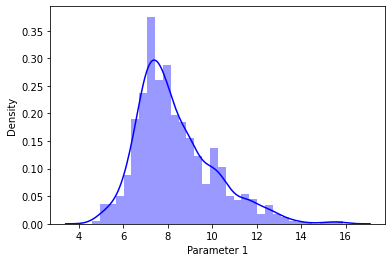

Distribution of  Parameter 1
Mean is: 8.31963727329581
Median is: 7.9
Mode is: 0    7.2
dtype: float64
Standard deviation is: 1.7410963181276953
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


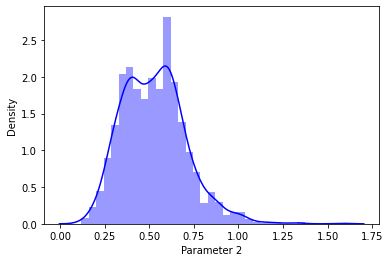

Distribution of  Parameter 2
Mean is: 0.5278205128205128
Median is: 0.52
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.17905970415353537
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


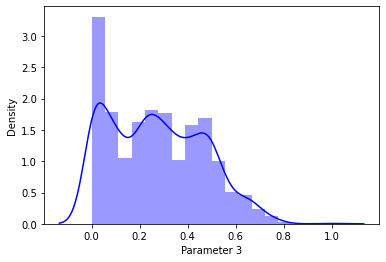

Distribution of  Parameter 3
Mean is: 0.2709756097560976
Median is: 0.26
Mode is: 0    0.0
dtype: float64
Standard deviation is: 0.19480113740531857
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


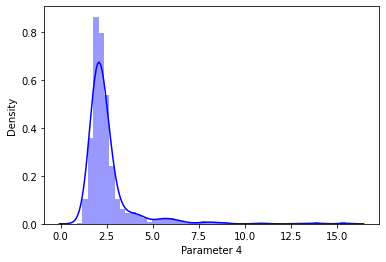

Distribution of  Parameter 4
Mean is: 2.53880550343965
Median is: 2.2
Mode is: 0    2.0
dtype: float64
Standard deviation is: 1.4099280595072798
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


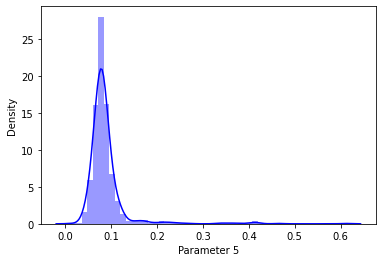

Distribution of  Parameter 5
Mean is: 0.08746654158849279
Median is: 0.079
Mode is: 0    0.08
dtype: float64
Standard deviation is: 0.0470653020100901
Skewness is: 5.680346571971724
Maximum is: 0.611
Minimum is: 0.012


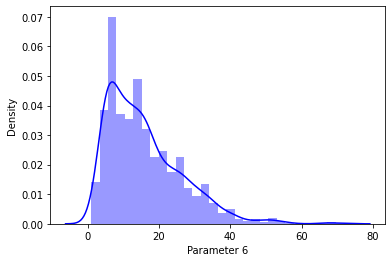

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
dtype: float64
Standard deviation is: 10.460156969809725
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


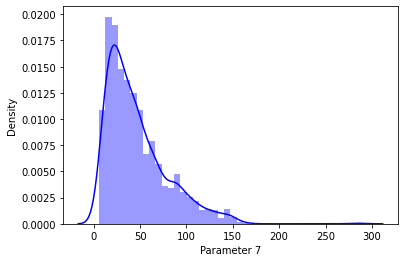

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
dtype: float64
Standard deviation is: 32.895324478299074
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


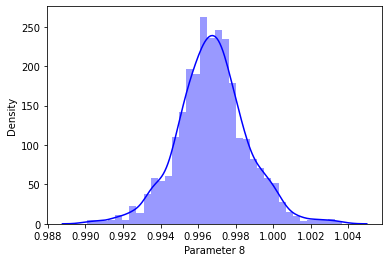

Distribution of  Parameter 8
Mean is: 0.9967466791744841
Median is: 0.99675
Mode is: 0    0.9972
dtype: float64
Standard deviation is: 0.0018873339538425554
Skewness is: 0.07128766294927483
Maximum is: 1.00369
Minimum is: 0.99007


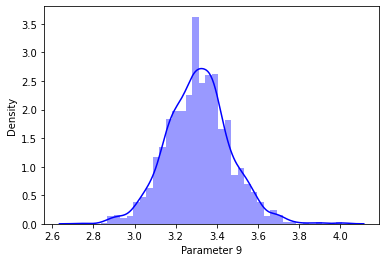

Distribution of  Parameter 9
Mean is: 3.3111131957473416
Median is: 3.31
Mode is: 0    3.3
dtype: float64
Standard deviation is: 0.15438646490354277
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


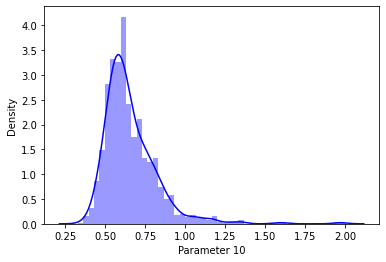

Distribution of  Parameter 10
Mean is: 0.6581488430268917
Median is: 0.62
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.16950697959010996
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


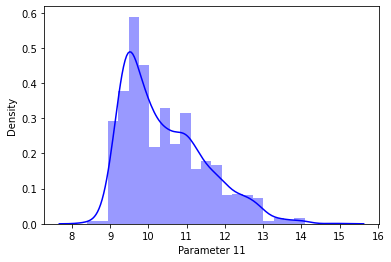

Distribution of  Parameter 11
Mean is: 10.422983114446529
Median is: 10.2
Mode is: 0    9.5
dtype: float64
Standard deviation is: 1.0656675818563988
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


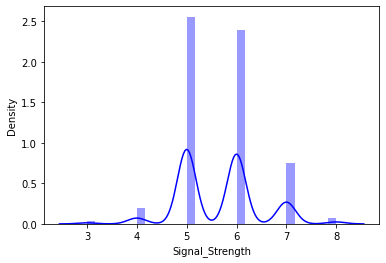

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.807569439734705
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [11]:
# studying the distribution of continuous attributes
cols = list(mydata)
for i in np.arange(len(cols)):
    sns.distplot(mydata[cols[i]], color='blue')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',mydata[cols[i]].mean())
    print('Median is:',mydata[cols[i]].median())
    print('Mode is:',mydata[cols[i]].mode())
    print('Standard deviation is:',mydata[cols[i]].std())
    print('Skewness is:',mydata[cols[i]].skew())
    print('Maximum is:',mydata[cols[i]].max())
    print('Minimum is:',mydata[cols[i]].min())

Mean, median and mode are almost overlapping or too close to each other ecept in Parameter 7 Parameter 3 is trimodal and Signal strength is a classification variable. All of them are positively skewed. Standard deviation is maximum for Parameter7, it is 32.895.

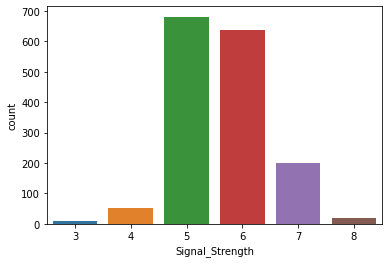

In [12]:
sns.countplot(mydata['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

Class 5.0 in 'Signal_Strength' has the highest count and class '4' and '8' has comparatively low representation

<Figure size 3600x3600 with 0 Axes>

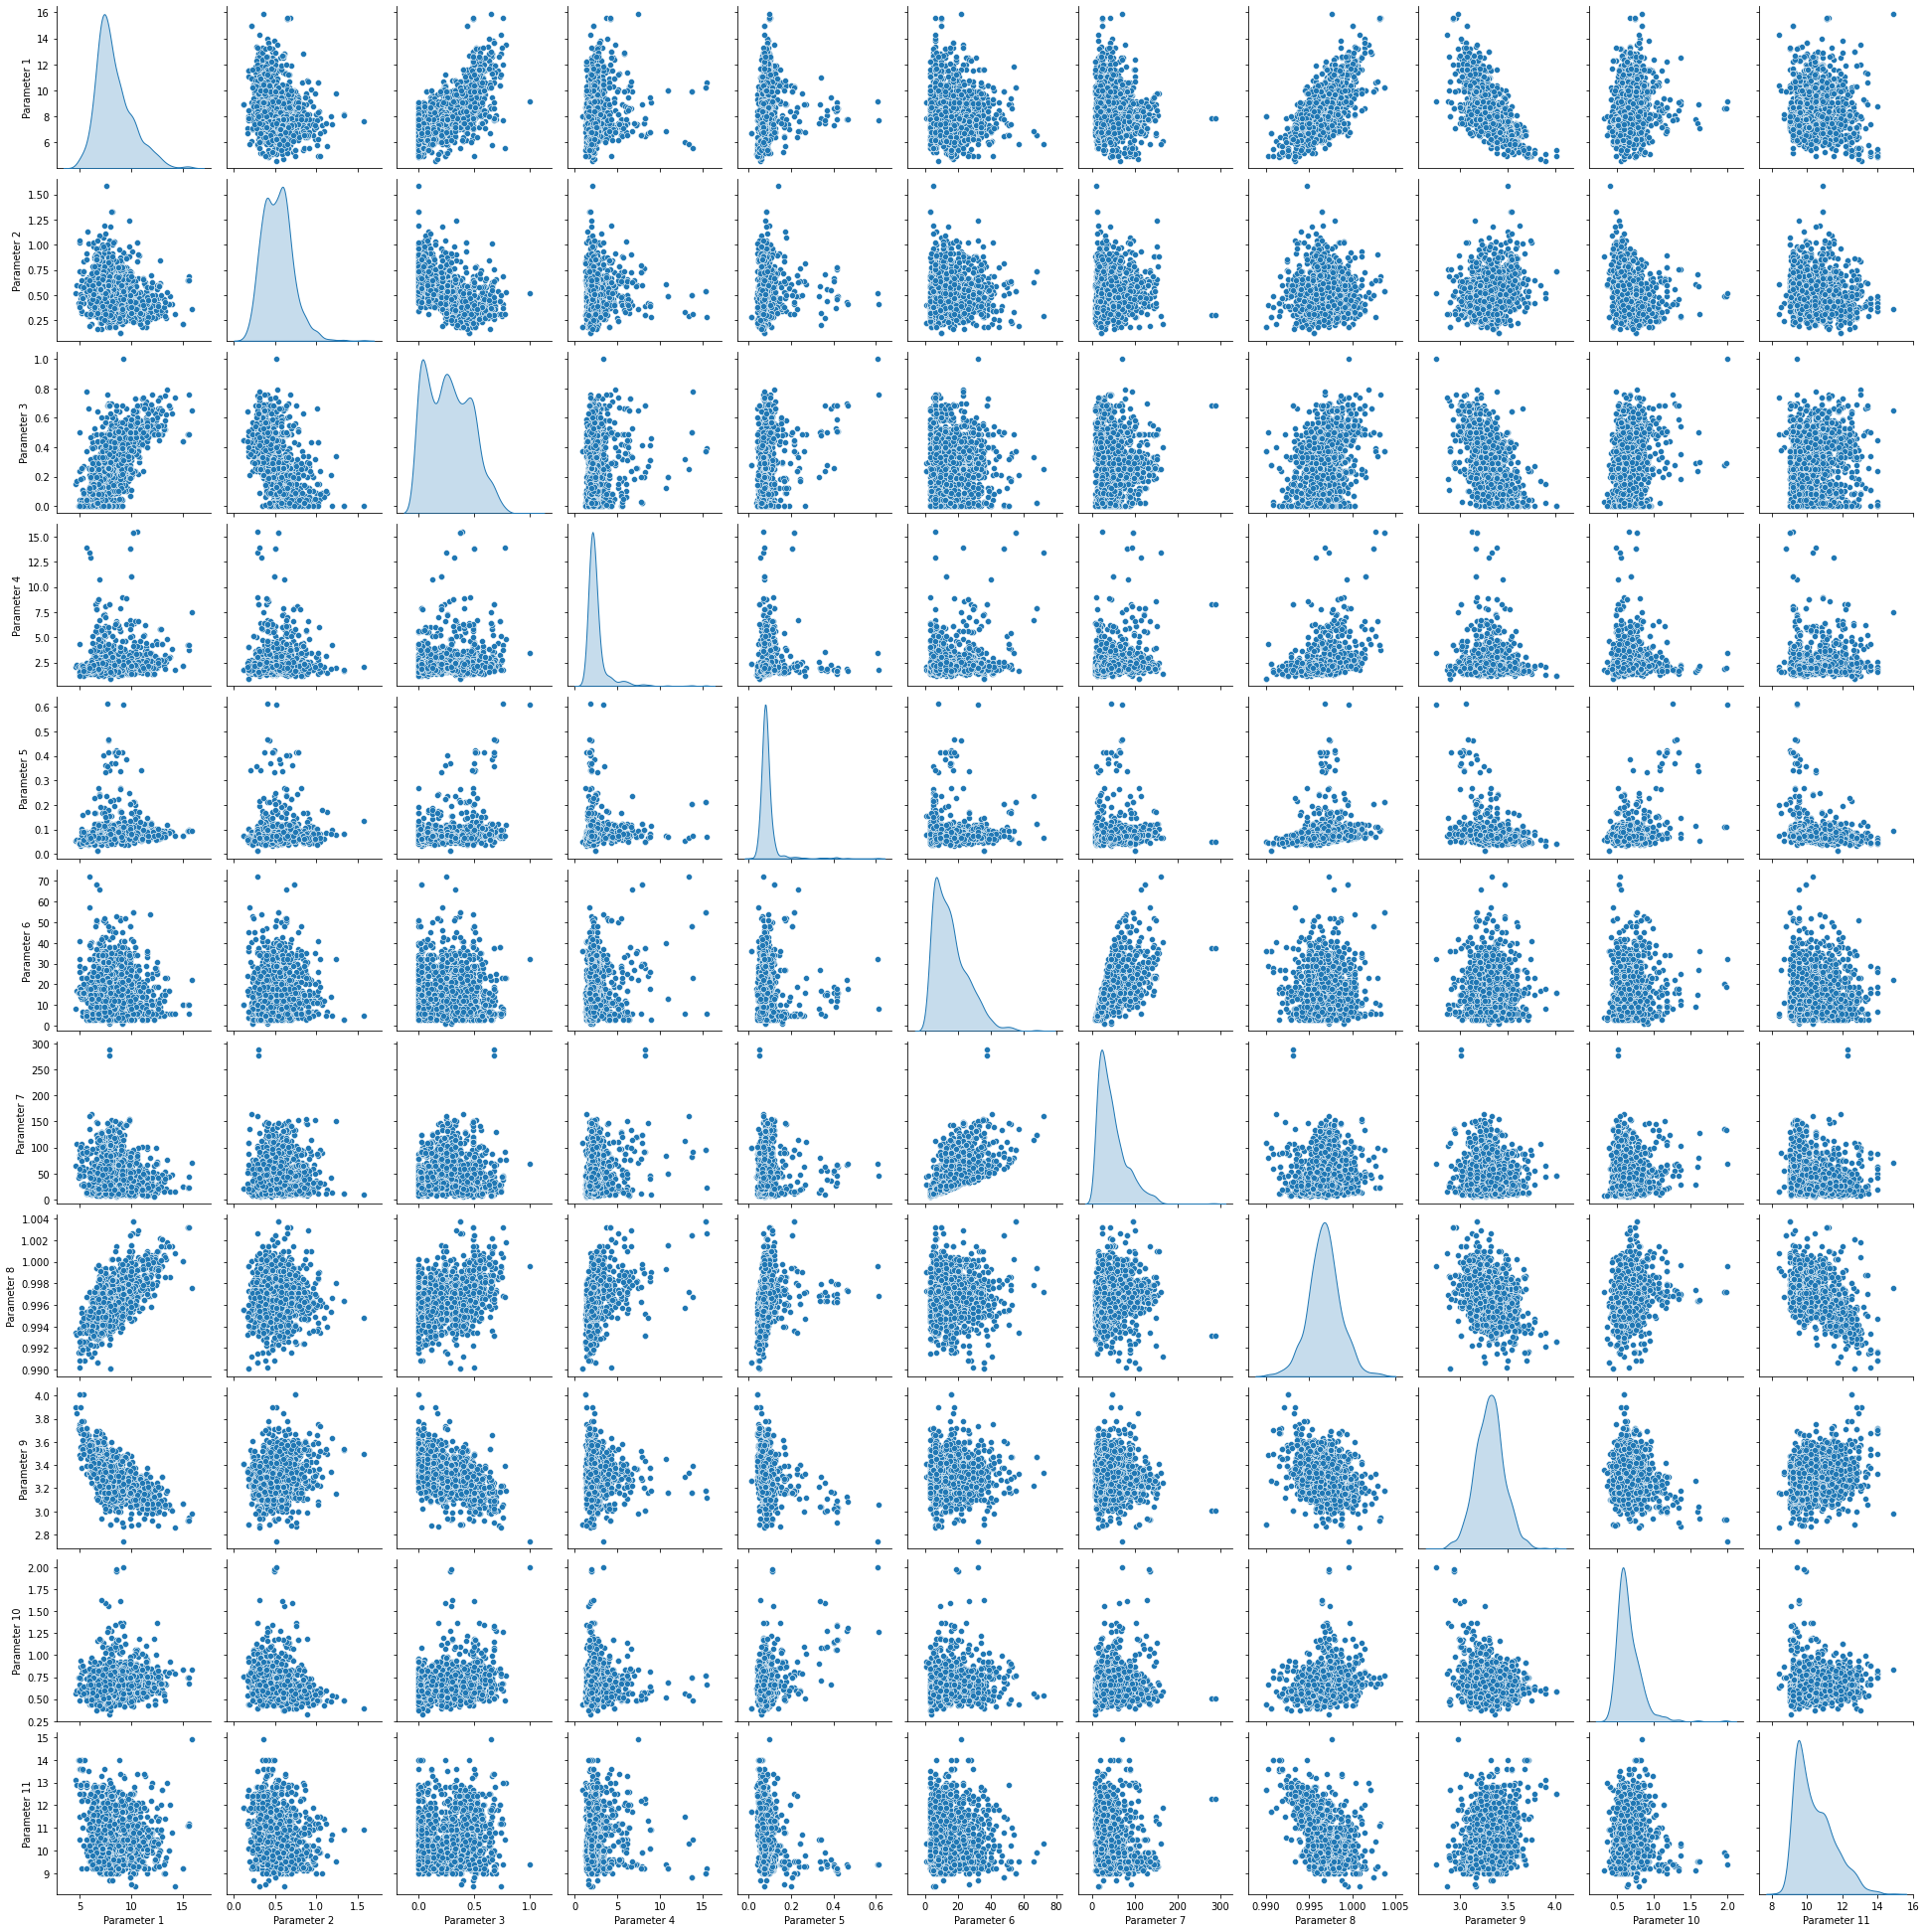

In [13]:
plt.figure(figsize = (50,50))
sns.pairplot(mydata.iloc[:,:-1],diag_kind='kde')
plt.show()

In [14]:
corr_max = mydata.iloc[:,:-1].corr()  #create correlation matrix
threshold = 0.5
corr_var_list = []
cols = mydata.iloc[:,:-1].columns.tolist()

for i in range(1, len(cols)):
    for j in range(i):
        if((abs(corr_max.iloc[i,j]) > threshold) & (abs(corr_max.iloc[i,j]) < 1)):
            corr_var_list.append([corr_max.iloc[i,j], i, j])

# Sort the list showing higher ones first 
sort_corr_list = sorted(corr_var_list, key=lambda x:abs(x[0]))

#Print correlations and column names
for corr_value, i, j in sort_corr_list:
    print (f"{cols[i]} and {cols[j]} = {round(corr_value, 2)}")

Parameter 9 and Parameter 3 = -0.54
Parameter 3 and Parameter 2 = -0.55
Parameter 7 and Parameter 6 = 0.67
Parameter 8 and Parameter 1 = 0.67
Parameter 3 and Parameter 1 = 0.67
Parameter 9 and Parameter 1 = -0.68


Parame 1 is correlated with param 3 and and param 8 positively and negetively correlated with param 9. And param 3 is negetively correlated with 9 and 2.But since, the correlation is not too high near 0.8 or above not dropping the features.

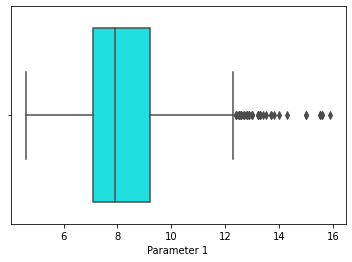

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 49


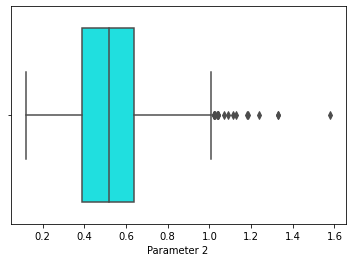

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 19


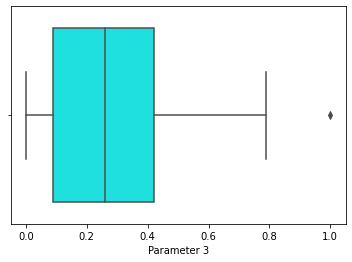

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker, Upper Whisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 1


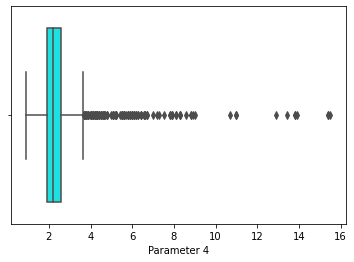

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 155


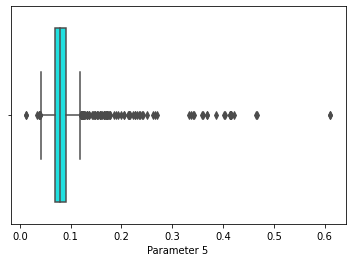

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker, Upper Whisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 112


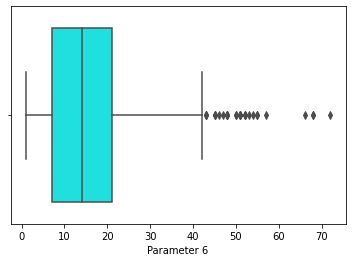

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 30


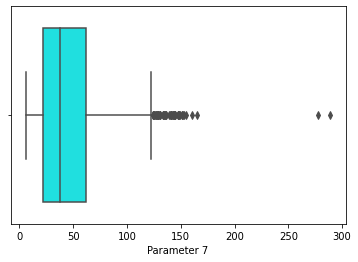

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker, Upper Whisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 55


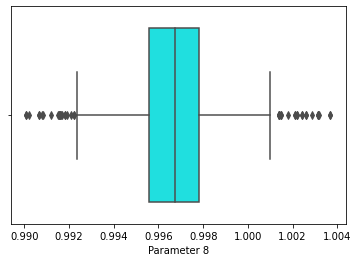

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.997835
IQR is: 0.002234999999999987
Lower Whisker, Upper Whisker :  0.9922475000000001 , 1.0011875
Out of  1599  rows in data, number of outliers are: 45


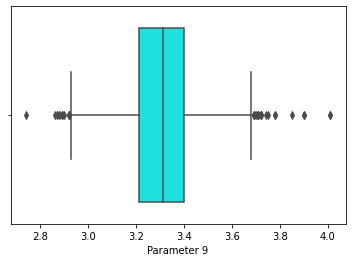

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 35


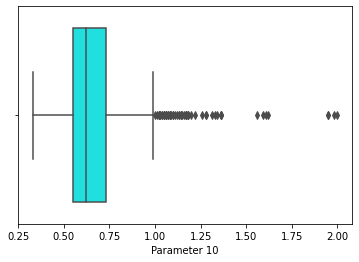

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 59


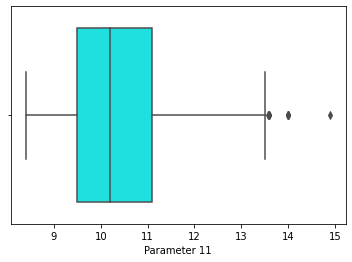

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 13


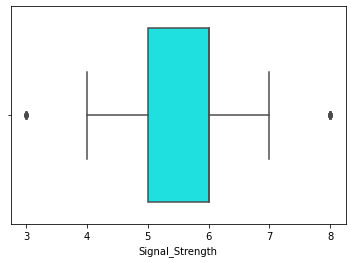

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 28


In [15]:
# Checking the presence of outliers
l = len(mydata)
col = list(mydata.columns)
#col.remove('condition')
for i in np.arange(len(col)):
    sns.boxplot(x= mydata[col[i]], color='cyan')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = mydata[col[i]].quantile(0.25)
    Q2 = mydata[col[i]].quantile(0.50)
    Q3 = mydata[col[i]].quantile(0.75) 
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)    
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (mydata[col[i]] < (Q1 - 1.5 *IQR)) |(mydata[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

Parameter 4 has the highest number of outliers which is 155.

In [16]:
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        #print('col',col)
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            #print('Inside if')
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            #print('Upper count=',up_cnt)
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            #print('lower count=',lw_cnt)
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
   #print('cols=',cols)
   # print('IQR_list=',IQR_list)
   # print('lower_boundary_list=',lower_boundary_list)
   # print('upper_boundary_list=',upper_boundary_list)
   # print('outliers_count=',outliers_count)
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    #print('Data=',ndf)
    #print('Columns having outliers=',cols)
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [61]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(mydata,'update')
if count>0:
    print('Updating dataset')
    mydata=df

Updating dataset


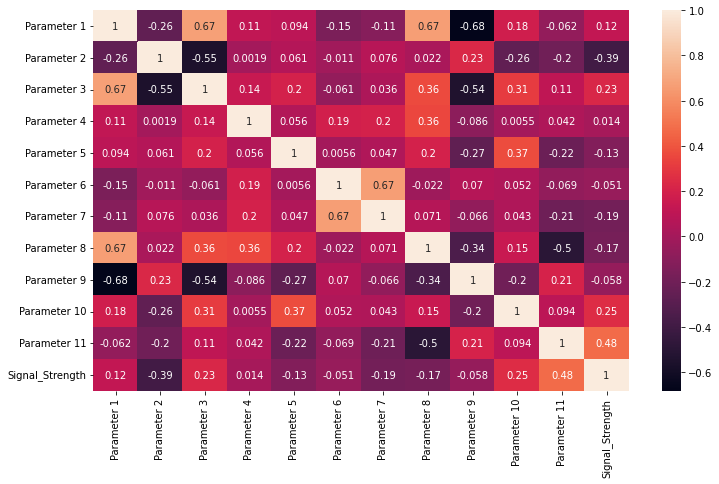

In [17]:
# studying correlation between the attributes
b_corr=mydata.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(b_corr,annot=True);

In [62]:
X = mydata.drop("Signal_Strength", axis=1)
y = mydata['Signal_Strength']

In [63]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=.20, random_state=seed)

In [64]:
X_train, X_valid,y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=.20, random_state=seed)

In [65]:
mydata['Signal_Strength'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
7.5     18
3.5     10
Name: Signal_Strength, dtype: int64

Here 4, 8 and 3 are underepresented

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [67]:
print(X_train.shape)
print(X_valid.shape)

(1023, 11)
(256, 11)


**Building a regressor**

In [68]:
model_reg = Sequential()
# Normalize input data
model_reg.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(11,))) ###Multiple Dense units with Relu activation
model_reg.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_reg.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_reg.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_reg.add(Dropout(0.5))
model_reg.add(BatchNormalization())
# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(Dense(1))

In [105]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
adam = optimizers.Adam(learning_rate = 0.001)
#sgd = optimizers.SGD(lr = 0.001)
model_reg.compile(optimizer = adam, loss='mse')

In [106]:
history = model_reg.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=100, batch_size=10)

Epoch 1/100
103/103 [==============================] - 1s 3ms/step - loss: 0.2556 - val_loss: 0.5188
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2516 - val_loss: 0.5000
Epoch 3/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2464 - val_loss: 0.5090
Epoch 4/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2362 - val_loss: 0.5187
Epoch 5/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2524 - val_loss: 0.5211
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2532 - val_loss: 0.5196
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2664 - val_loss: 0.4998
Epoch 8/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2626 - val_loss: 0.4781
Epoch 9/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2615 - val_loss: 0.5007
Epoch 10/100
103/103 [==============================] - 0s 2ms/step - loss: 0.2585 - val_lo

In [107]:
mse_test = model_reg.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4489


In [ ]:
#X_new = X_test[:3] # pretending these are new instances
#y_pred = model_reg.predict(X_new)

In [108]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RR_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_reg, file)

In [109]:
# Load the Model back from file

with open(Pkl_Filename, 'rb') as file:  
    Pickled_RR_Model = pickle.load(file)

Pickled_RR_Model

In [110]:
y_pred = Pickled_RR_Model(X_test)

In [111]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])


tf.Tensor([5.7769303], shape=(1,), dtype=float32)
tf.Tensor([6.07076], shape=(1,), dtype=float32)
tf.Tensor([5.833382], shape=(1,), dtype=float32)
tf.Tensor([5.542139], shape=(1,), dtype=float32)
tf.Tensor([5.7403884], shape=(1,), dtype=float32)


In [112]:
print(y_test.head())

1526    6.0
674     6.0
1508    6.0
58      5.0
1351    6.0
Name: Signal_Strength, dtype: float64


**The first 5 elements of y_pred and y_test are close (if we apply normal approximation rule it mathches)**

In [113]:
from sklearn.metrics import r2_score
score_r = r2_score(y_test,y_pred)
print(score_r)

0.19189239278972603


In [114]:
#summary of regression model
Pickled_RR_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                      

**Fine-Tune the model using RandomizedSearcheCv**

In [115]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(11,)):
 model = keras.models.Sequential()
 options = {"input_shape": input_shape}
 for layer in range(n_hidden):
   model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
 options = {}
 model.add(keras.layers.Dense(1, **options))
 optimizer = keras.optimizers.SGD(learning_rate)
 model.compile(loss="mse", optimizer=optimizer)
 return model

In [116]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [117]:
keras_reg.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred_1 = keras_reg.predict(X_test)

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 16.3038 - val_loss: 4.9423
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.0777 - val_loss: 1.8376
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.6573 - val_loss: 1.5421
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3832 - val_loss: 1.4224
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2369 - val_loss: 1.3422
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1393 - val_loss: 1.2694
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0613 - val_loss: 1.2173
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0002 - val_loss: 1.1780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9494 - val_loss: 1.1401
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9059 - val_loss: 1.0934
Epoch 11

In [118]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
rnd_search_cv.best_params_

Epoch 1/100
22/22 [==============================] - 0s 6ms/step - loss: 35.7771 - val_loss: 30.6898
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 29.3170 - val_loss: 25.1498
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 24.1220 - val_loss: 20.5914
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 19.8293 - val_loss: 16.8531
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 16.2924 - val_loss: 13.7879
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 13.3861 - val_loss: 11.2640
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 10.9871 - val_loss: 9.2154
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 9.0369 - val_loss: 7.5571
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 7.4534 - val_loss: 6.2207
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 6.1743 - val_loss: 5.1

In [119]:
rnd_search_cv.best_params_

{'learning_rate': 0.019783736096594833, 'n_hidden': 0, 'n_neurons': 64}

In [120]:
rnd_search_cv.best_score_

-0.3982380231221517

In [124]:
# Best model after radomisedsearchcv
model_b = rnd_search_cv.best_estimator_.model

# Part: B

# Context: 
A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic 
example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic 
images. 
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address 
helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest 
to the optical character recognition community. 
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This 
difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character 
arrangements. 
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition 
factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain 
some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors

# Data Description:
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on 
data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained 
from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

# OBJECTIVE: 
We will build a digit classifier on the SVHN (Street View Housing Number) dataset.

In [125]:
import h5py

In [126]:
h5f =h5py.File('/content/drive/My Drive/PyData/Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [127]:
x_train = h5f['X_train'][:]
y_train1= h5f['y_train'][:]
x_test= h5f['X_test'][:]
y_test1= h5f['y_test'][:]

In [128]:
h5f.close

<bound method File.close of <HDF5 file "Autonomous_Vehicles_SVHN_single_grey1.h5" (mode r)>>

In [129]:
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten

In [130]:
# fix random seed for reproducability 
seed = 7
np.random.seed(seed)

**Visualizing images from our data**

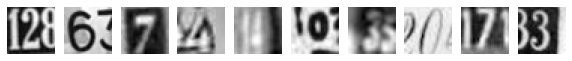

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i], cmap="gray")
  plt.axis('off')
plt.show()
print('label for each of the above image:%s'%(y_train1[0:10]))

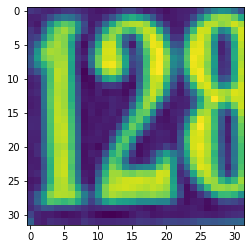

Label:  2


In [133]:
plt.imshow(x_train[0])    # show first number in the train dataset
plt.show()
print('Label: ', y_train1[0])

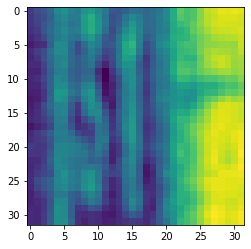

Label:  1


In [134]:
plt.imshow(x_test[0])    # show first number in the test dataset
plt.show()
print('Label: ', y_test1[0])

**Data Preprocessing**

In [135]:
# Flatten the images
image_vector_size = 32*32
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set', x_train.shape, y_train1.shape)
print('Test set', x_test.shape, y_test1.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


In [136]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train1)
y_test=np_utils.to_categorical(y_test1)

#no of classes
num_classes= y_test.shape[1]
num_hidden=32
print("Number of classes: ",num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

Number of classes:  10
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [137]:
y_train.shape

(42000, 10)

**Model 1**

In [138]:
# define model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout,MaxPooling2D
from keras.layers import BatchNormalization


In [139]:
# define model

image_size=32*32

# create model
model = Sequential()  

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used 

In [140]:
# Compile model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [141]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [142]:
# Fit the model
history=model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
263/263 - 2s - loss: 2.3107 - accuracy: 0.1084 - val_loss: 2.2983 - val_accuracy: 0.1007 - lr: 0.0010 - 2s/epoch - 7ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
263/263 - 2s - loss: 2.0776 - accuracy: 0.2431 - val_loss: 1.6234 - val_accuracy: 0.4594 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
263/263 - 2s - loss: 1.4619 - accuracy: 0.5189 - val_loss: 1.3167 - val_accuracy: 0.5740 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
263/263 - 1s - loss: 1.2376 - accuracy: 0.6057 - val_loss: 1.1891 - val_accuracy: 0.6244 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
263/263 - 2s - loss: 1.1830 - accuracy: 0.6222 - val_loss: 1.1208 - val_accuracy: 0.6490 - lr: 0.0010 - 2s/epoch - 6ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
263/263 - 1s - loss: 1.1149 - accuracy: 0.6502 - val_los

In [143]:
## Looking into our base model
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 256)               262400    
                                                                 
 dense_104 (Dense)           (None, 64)                16448     
                                                                 
 dense_105 (Dense)           (None, 64)                4160      
                                                                 
 dense_106 (Dense)           (None, 32)                2080      
                                                                 
 dense_107 (Dense)           (None, 10)                330       
                                                                 
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0
_________________________________________________________________


In [144]:
results = model.evaluate(x_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.9640 - accuracy: 0.7029


In [145]:
# predicting the model on test data
y_pred=model.predict(x_test)

In [146]:
y_pred[0]

array([0.15694143, 0.04671934, 0.16236421, 0.0747515 , 0.06567703,
       0.06917028, 0.09390464, 0.03210562, 0.1627585 , 0.13560745],
      dtype=float32)

In [147]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [148]:
y_pred_final[0]

8

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred_final))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1814
           1       0.68      0.74      0.71      1828
           2       0.73      0.73      0.73      1803
           3       0.71      0.63      0.67      1719
           4       0.71      0.80      0.75      1812
           5       0.63      0.66      0.65      1768
           6       0.74      0.68      0.71      1832
           7       0.65      0.80      0.72      1808
           8       0.76      0.58      0.66      1812
           9       0.74      0.66      0.70      1804

    accuracy                           0.70     18000
   macro avg       0.71      0.70      0.70     18000
weighted avg       0.71      0.70      0.70     18000



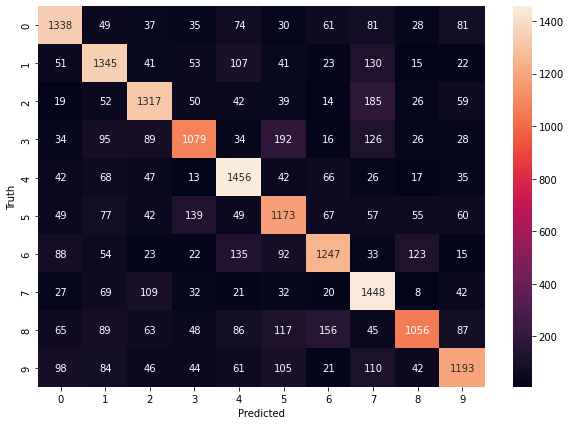

In [150]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test1,y_pred_final)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [151]:
index = 0
misclassified_images = []
for label, predict in zip(y_test1, y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[0, 1, 7, 8, 11, 14, 18, 23, 24, 25, 26, 27, 37, 40, 45, 57, 67, 68, 74, 76, 78, 85, 89, 93, 96, 100, 102, 103, 108, 120, 125, 126, 127, 132, 136, 138, 140, 141, 142, 149, 150, 151, 152, 154, 155, 158, 159, 160, 162, 163, 167, 170, 175, 176, 177, 180, 182, 183, 184, 185, 188, 194, 197, 199, 200, 202, 203, 206, 210, 219, 222, 223, 228, 230, 232, 235, 239, 246, 251, 252, 253, 267, 268, 270, 278, 284, 301, 302, 303, 304, 305, 306, 307, 310, 317, 323, 330, 331, 332, 337, 339, 340, 346, 347, 351, 353, 356, 360, 363, 366, 372, 373, 375, 378, 396, 398, 400, 402, 403, 404, 407, 411, 415, 418, 426, 428, 434, 436, 437, 438, 446, 448, 451, 454, 456, 457, 466, 474, 480, 481, 485, 489, 490, 492, 494, 496, 497, 498, 502, 503, 504, 505, 507, 510, 511, 516, 520, 523, 524, 527, 528, 530, 532, 534, 535, 537, 543, 551, 552, 553, 556, 560, 562, 570, 579, 581, 586, 590, 591, 592, 600, 604, 608, 612, 614, 615, 617, 619, 620, 621, 630, 633, 640, 648, 651, 652, 663, 664, 665, 671, 672, 678, 679, 683, 689, 690

**Predicting output**

Was predicted  1
Was labeled  7
Predicted Probabilities:  [[0.03773718 0.4394377  0.00902285 0.03922484 0.10921661 0.0808242
  0.02546681 0.18475841 0.03099039 0.04332109]]


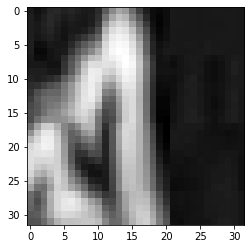

In [152]:
image_index = 108
plt.imshow(x_test[image_index].reshape(32, 32),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(-1, 1024))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test1[image_index])
print("Predicted Probabilities: ",pred)

**Accuracy Curve**

In [153]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


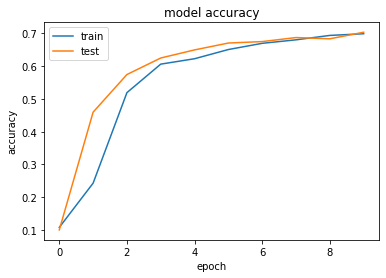

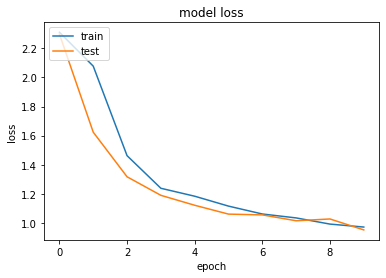

In [154]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

**MOdel 2: Using batch normalisation and dropout**

In [155]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(256, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [156]:
model1 = mlp_model()
history_1 = model1.fit(x_train, y_train,validation_split=0.2,epochs=10, batch_size=128, verbose=1)#summarize history for accuracy

Epoch 1/10
263/263 [==============================] - 3s 9ms/step - loss: 2.2714 - accuracy: 0.1878 - val_loss: 2.0188 - val_accuracy: 0.2723
Epoch 2/10
263/263 [==============================] - 2s 9ms/step - loss: 1.7854 - accuracy: 0.3566 - val_loss: 1.7267 - val_accuracy: 0.3924
Epoch 3/10
263/263 [==============================] - 2s 7ms/step - loss: 1.5502 - accuracy: 0.4610 - val_loss: 1.4870 - val_accuracy: 0.4915
Epoch 4/10
263/263 [==============================] - 2s 8ms/step - loss: 1.4007 - accuracy: 0.5253 - val_loss: 1.4329 - val_accuracy: 0.5231
Epoch 5/10
263/263 [==============================] - 2s 7ms/step - loss: 1.2958 - accuracy: 0.5724 - val_loss: 1.4374 - val_accuracy: 0.5139
Epoch 6/10
263/263 [==============================] - 2s 7ms/step - loss: 1.2017 - accuracy: 0.6130 - val_loss: 1.2427 - val_accuracy: 0.6014
Epoch 7/10
263/263 [==============================] - 2s 7ms/step - loss: 1.1401 - accuracy: 0.6360 - val_loss: 1.1256 - val_accuracy: 0.6368
Epoch 

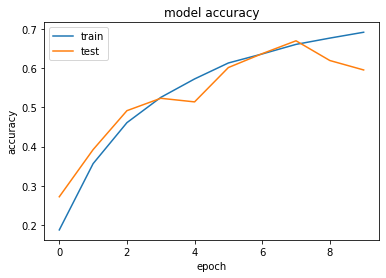

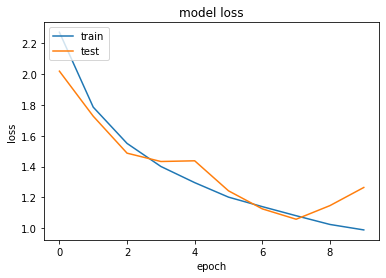

In [157]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [158]:
y_pred_1=model1.predict(x_test)

In [159]:
y_pred_1[0]

array([0.07177308, 0.2799784 , 0.1264452 , 0.07016478, 0.14469568,
       0.03884412, 0.04173663, 0.0830211 , 0.07666947, 0.06667157],
      dtype=float32)

In [160]:
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

In [161]:
y_pred_final_1[0]

1

In [162]:
# Generating Classification report
print(classification_report(y_test1,y_pred_final_1))

              precision    recall  f1-score   support

           0       0.87      0.42      0.57      1814
           1       0.32      0.86      0.47      1828
           2       0.77      0.65      0.70      1803
           3       0.82      0.47      0.60      1719
           4       0.47      0.76      0.58      1812
           5       0.81      0.57      0.67      1768
           6       0.84      0.44      0.58      1832
           7       0.81      0.69      0.75      1808
           8       0.61      0.55      0.58      1812
           9       0.75      0.55      0.63      1804

    accuracy                           0.60     18000
   macro avg       0.71      0.60      0.61     18000
weighted avg       0.71      0.60      0.61     18000



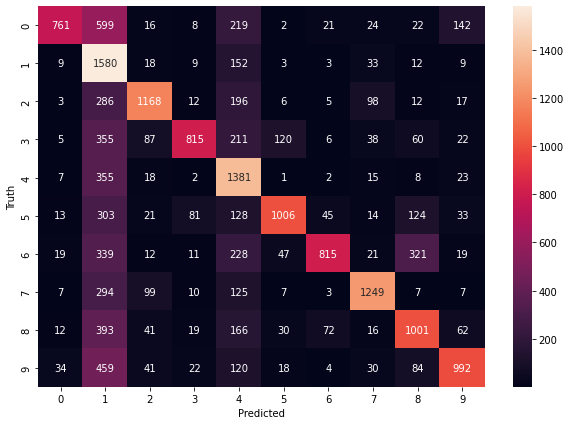

In [163]:
cm=confusion_matrix(y_test1,y_pred_final_1)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [164]:
#MissClassified Images
index = 0
misclassified_images = []
for label, predict in zip(y_test1, y_pred_final_1):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[1, 4, 7, 8, 11, 14, 17, 18, 20, 24, 26, 29, 32, 34, 37, 40, 45, 46, 47, 56, 58, 63, 64, 67, 72, 78, 79, 88, 89, 90, 92, 93, 96, 97, 100, 102, 108, 109, 111, 114, 118, 120, 122, 125, 132, 136, 137, 138, 139, 140, 142, 145, 146, 147, 148, 150, 152, 154, 155, 156, 158, 160, 161, 162, 163, 167, 170, 172, 175, 176, 177, 182, 183, 184, 185, 186, 187, 188, 189, 194, 201, 203, 205, 207, 210, 216, 218, 219, 222, 223, 227, 230, 231, 232, 235, 239, 242, 245, 246, 252, 253, 257, 262, 267, 268, 271, 274, 275, 277, 284, 285, 288, 301, 303, 304, 307, 311, 323, 324, 326, 330, 337, 344, 346, 347, 351, 356, 360, 362, 363, 366, 372, 374, 375, 380, 388, 389, 392, 396, 398, 400, 402, 403, 404, 411, 418, 419, 420, 426, 427, 429, 430, 432, 433, 434, 437, 438, 440, 444, 446, 448, 449, 450, 451, 454, 455, 456, 457, 460, 461, 466, 475, 484, 486, 487, 489, 490, 492, 496, 501, 502, 504, 505, 507, 510, 511, 514, 515, 516, 517, 520, 523, 524, 525, 526, 527, 528, 529, 530, 532, 535, 537, 539, 542, 543, 544, 545, 54

Was predicted  8
Was labeled  3
Predicted Probabilities:  [[0.04042993 0.0807148  0.08876439 0.10385127 0.06554293 0.13526037
  0.10610066 0.05469252 0.24428079 0.08036243]]


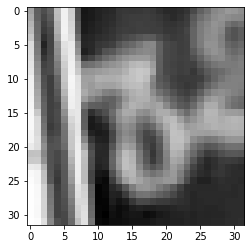

In [177]:
image_index = 138
plt.imshow(x_test[image_index].reshape(32,32),cmap='Greys')
pred = model1.predict(x_test[image_index].reshape(-1, 1024))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test1[image_index])
print("Predicted Probabilities: ",pred)

**Model 3(Another Model with minute differences)**

In [166]:
# create model
def nn_model():
  model= Sequential()
  model.add(BatchNormalization(input_shape=((1024,)))) 
  model.add(Dense(256,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  # compile the model
  adam = optimizers.Adam(lr =1e-3)
  model.compile(loss=losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy'])
  return model


In [167]:
# Build the model
model_2 = nn_model()
# Fit the model
history_2 = model_2.fit(x_train,y_train,validation_split=0.2,epochs=30,batch_size=200,verbose=2)

Epoch 1/30
168/168 - 2s - loss: 1.6250 - accuracy: 0.4459 - val_loss: 1.4488 - val_accuracy: 0.6248 - 2s/epoch - 13ms/step
Epoch 2/30
168/168 - 2s - loss: 1.0148 - accuracy: 0.6821 - val_loss: 1.0077 - val_accuracy: 0.6977 - 2s/epoch - 10ms/step
Epoch 3/30
168/168 - 2s - loss: 0.8463 - accuracy: 0.7390 - val_loss: 0.8355 - val_accuracy: 0.7471 - 2s/epoch - 10ms/step
Epoch 4/30
168/168 - 2s - loss: 0.7541 - accuracy: 0.7664 - val_loss: 0.7859 - val_accuracy: 0.7631 - 2s/epoch - 10ms/step
Epoch 5/30
168/168 - 2s - loss: 0.6939 - accuracy: 0.7846 - val_loss: 0.7461 - val_accuracy: 0.7749 - 2s/epoch - 10ms/step
Epoch 6/30
168/168 - 2s - loss: 0.6349 - accuracy: 0.8018 - val_loss: 0.7239 - val_accuracy: 0.7844 - 2s/epoch - 9ms/step
Epoch 7/30
168/168 - 2s - loss: 0.6068 - accuracy: 0.8103 - val_loss: 0.7000 - val_accuracy: 0.7929 - 2s/epoch - 10ms/step
Epoch 8/30
168/168 - 2s - loss: 0.5673 - accuracy: 0.8246 - val_loss: 0.6946 - val_accuracy: 0.7899 - 2s/epoch - 9ms/step
Epoch 9/30
168/168

In [168]:
scores= model_2.evaluate(x_test,y_test,verbose=1)
print("Error:%.2f%%" %(100-scores[1]*100))
model_2.summary()

563/563 [==============================] - 1s 2ms/step - loss: 0.7240 - accuracy: 0.8281
Error:17.19%
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_113 (Dense)           (None, 256)               262400    
                                                                 
 dense_114 (Dense)           (None, 64)                16448     
                                                                 
 dense_115 (Dense)           (None, 32)                2080      
                                                                 
 dense_116 (Dense)           (None, 10)                330       
                                                                 
Total params: 285

In [169]:
y_pred_2=model_2.predict(x_test)


In [170]:
y_pred_2[0]

array([0.02279955, 0.04341838, 0.1017777 , 0.01350918, 0.00118725,
       0.00908795, 0.57396674, 0.03299894, 0.2000061 , 0.00124819],
      dtype=float32)

In [171]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final_2=[]
for i in y_pred_2:
  y_pred_final_2.append(np.argmax(i))

In [172]:
y_pred_final_2[0]

6

In [173]:
# Classification Report
print(classification_report(y_test1,y_pred_final_2))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1814
           1       0.80      0.88      0.84      1828
           2       0.87      0.83      0.85      1803
           3       0.80      0.79      0.79      1719
           4       0.89      0.84      0.87      1812
           5       0.83      0.80      0.82      1768
           6       0.77      0.85      0.81      1832
           7       0.86      0.88      0.87      1808
           8       0.81      0.76      0.79      1812
           9       0.81      0.78      0.79      1804

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



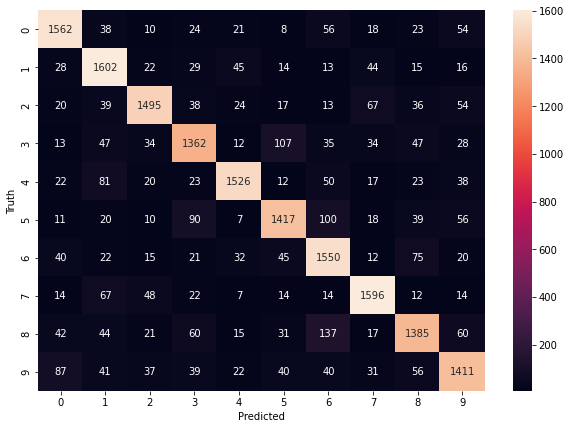

In [174]:
# Confusion matrix
cm=confusion_matrix(y_test1,y_pred_final_2)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [175]:
print(np.argmax(y_pred_2[4]))
print(np.argmax(y_test[4]))
print(history_2.history.keys())

0
0
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


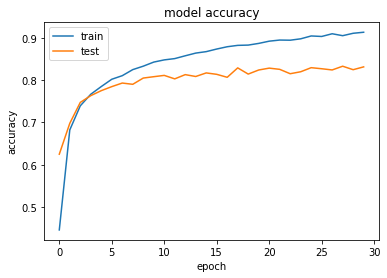

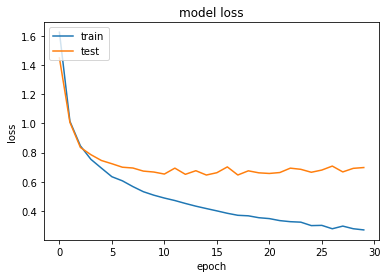

In [176]:
#summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# Summary

1. mode 1: 0.70, model 2: 0.60 and in model 3: 0.83 these are the accuracy score of my models. The 1st model is a simple one.In the 2nd model I have use batch normalisation and dropout, and in the 3rd model I tuned it without any fancy technique.
2. However in the train-test curve model 2 is in a sink, but performance is not better than model 3.
3. In model 3 we can observe that train curve in tend to overfit but the the test curve has a threshold(means after a certain number of epoch it moves 
parallel to x-axis, that means it's preformace has reached in a saturation point.)
4. This classification model can also be fine-tuned by using different methods like RandomisedSearchCV, Hyperopt, Talos,... etc.